<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19.1 Root Finding Problem Statement


In numerical analysis, the **root finding problem** is a fundamental task where we seek a value \( x \) such that the function \( f(x) = 0 \). This problem is central to many engineering and scientific applications where analytical solutions are difficult or impossible to obtain.

The goal is to determine the value(s) of \( x \) at which the function \( f(x) \) crosses the x-axis. A common approach is based on the **Intermediate Value Theorem**, which states that if \( f \) is continuous on the interval \([a, b]\) and \( f(a) \) and \( f(b) \) have opposite signs, then there exists at least one root in \([a, b]\).

## Numerical Methods for Root Finding

- **Bisection Method:**  
  This method starts with an interval \([a, b]\) where the function changes sign and repeatedly halves the interval until the root is approximated within a desired tolerance.

- **Newton's Method:**  
  An iterative method that uses the function and its derivative to quickly converge to a root. It requires a good initial guess and that the derivative is available and non-zero at the guess.

- **Secant Method:**  
  Similar to Newton's Method but uses finite differences to approximate the derivative. This method can be useful when the derivative is difficult to compute.

## Considerations When Finding Roots

- **Continuity:** The function must be continuous on the interval of interest.
- **Initial Guess or Interval:** A good initial guess (or a bracketing interval) can affect the convergence and success of the method.
- **Convergence Criteria:** Define a tolerance level to determine when the approximate root is close enough to the actual root.
- **Multiple Roots:** Some functions have more than one root, so the method and interval chosen may find only one of the possible roots.

Root found: 2.0945514815412025


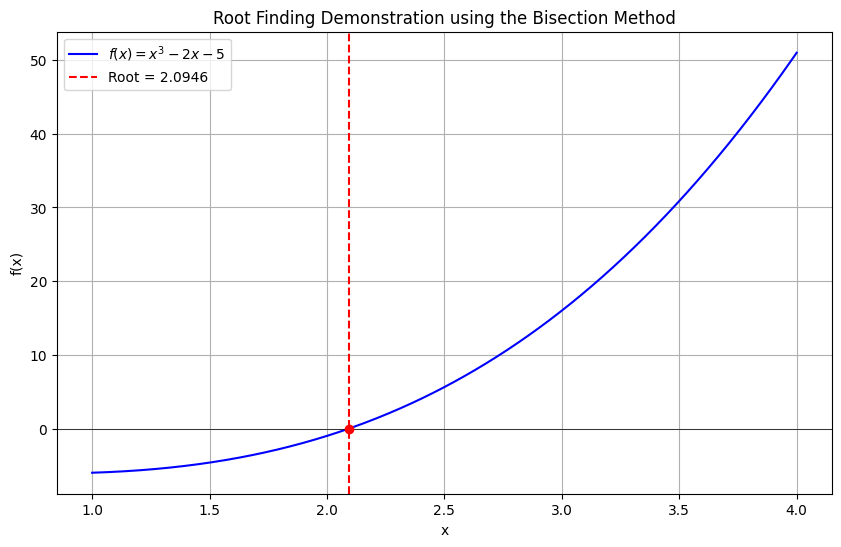

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

def f(x):
    return x**3 - 2*x - 5

a, b = 2, 3

root = bisect(f, a, b)
print("Root found:", root)

x = np.linspace(a - 1, b + 1, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x) = x^3 - 2x - 5$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color='red', linestyle='--', label=f'Root = {root:.4f}')
plt.scatter(root, f(root), color='red', zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Root Finding Demonstration using the Bisection Method')
plt.legend()
plt.grid(True)
plt.show()




---



# 19.2 Tolerance in Root Finding Algorithms

In numerical methods, **tolerance** refers to the acceptable level of error in an approximation. When solving a root finding problem (i.e., finding a value \( x \) such that \( f(x) = 0 \)), tolerance serves as a stopping criterion for iterative algorithms. It defines when the successive approximations are "close enough" to the true root, ensuring that the algorithm halts once an acceptable level of accuracy is reached.

## Types of Tolerance
- **Absolute Tolerance:**  
  An absolute error threshold where the difference between successive approximations (or the function value at an approximation) must be smaller than a specified value, e.g., \(|x_{n+1} - x_n| < \text{tol}\).

- **Relative Tolerance:**  
  A threshold that scales with the magnitude of the values involved. This is particularly useful when dealing with very large or very small numbers, ensuring that the error is proportionally acceptable.

Estimated Root: 2.094559
Total Iterations: 16


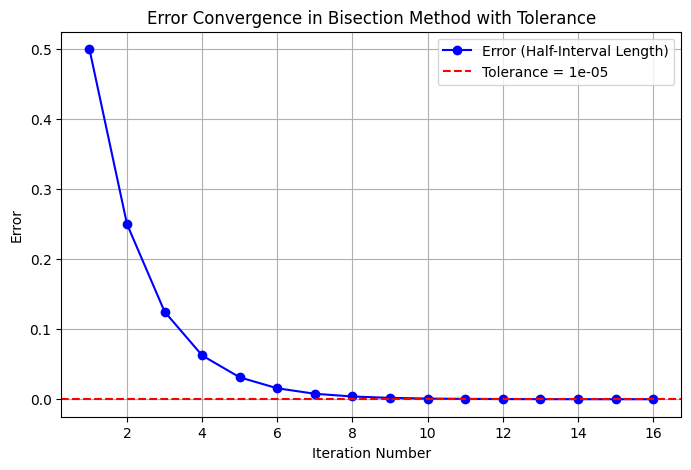

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 2*x - 5

a, b = 2, 3
tol = 1e-5
errors = []
iterations = 0

while (b - a) / 2 > tol:
    m = (a + b) / 2
    current_error = (b - a) / 2
    errors.append(current_error)

    if np.sign(f(a)) * np.sign(f(m)) < 0:
        b = m
    else:
        a = m

    iterations += 1

print(f"Estimated Root: {m:.6f}")
print(f"Total Iterations: {iterations}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, iterations + 1), errors, marker='o', linestyle='-', color='blue', label='Error (Half-Interval Length)')
plt.axhline(y=tol, color='red', linestyle='--', label=f'Tolerance = {tol}')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Convergence in Bisection Method with Tolerance')
plt.legend()
plt.grid(True)
plt.show()




---



# 19.3 Bisection Method

## Introduction
The **Bisection Method** is a straightforward and robust numerical technique for finding a root of a continuous function \( f(x) = 0 \). It is based on the Intermediate Value Theorem, which states that if \( f(x) \) is continuous on an interval \([a, b]\) and \( f(a) \) and \( f(b) \) have opposite signs, then there exists at least one root in that interval.

## The Algorithm

1. **Choosing an Initial Interval:**  
   Start with an interval \([a, b]\) where \( f(a) \) and \( f(b) \) have opposite signs.

2. **Computing the Midpoint:**  
   Calculate the midpoint \( m = \frac{a+b}{2} \).

3. **Determining the Subinterval:**  
   Evaluate \( f(m) \).  
   - If \( f(m) \) is sufficiently close to zero (or within a defined tolerance), then \( m \) is the approximate root.  
   - Otherwise, select the subinterval \([a, m]\) or \([m, b]\) where the sign change occurs (i.e., where \( f(a) \) and \( f(m) \) or \( f(m) \) and \( f(b) \) have opposite signs).

4. **Iteration:**  
   Replace the original interval with the chosen subinterval and repeat the process until the interval’s length is less than a specified tolerance or a maximum number of iterations is reached.


- **Advantages:**
  - Guaranteed convergence if the function is continuous on \([a, b]\) and a sign change exists.
  - Simple to implement and understand.
  
- **Limitations:**
  - Convergence is **linear**, meaning it can be relatively slow.
  - It requires the initial interval to have endpoints with opposite signs.


Estimated Root: 2.094559
Number of Iterations: 16


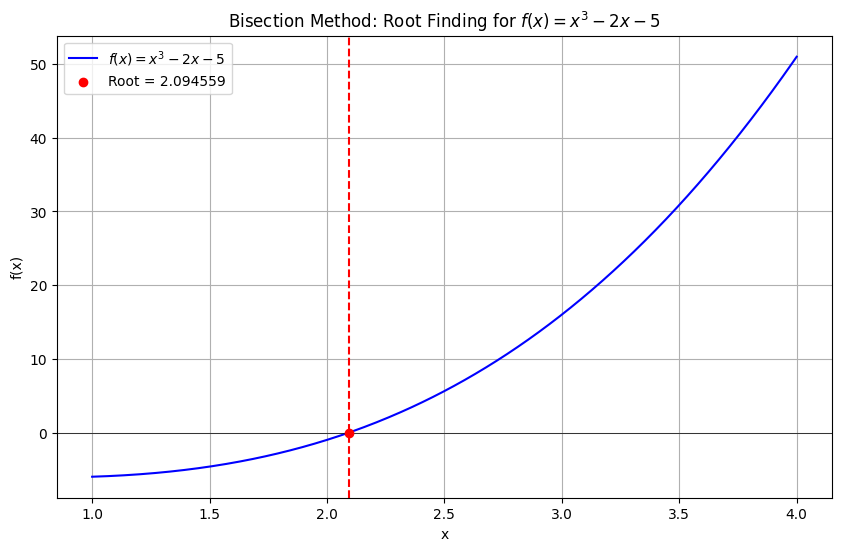

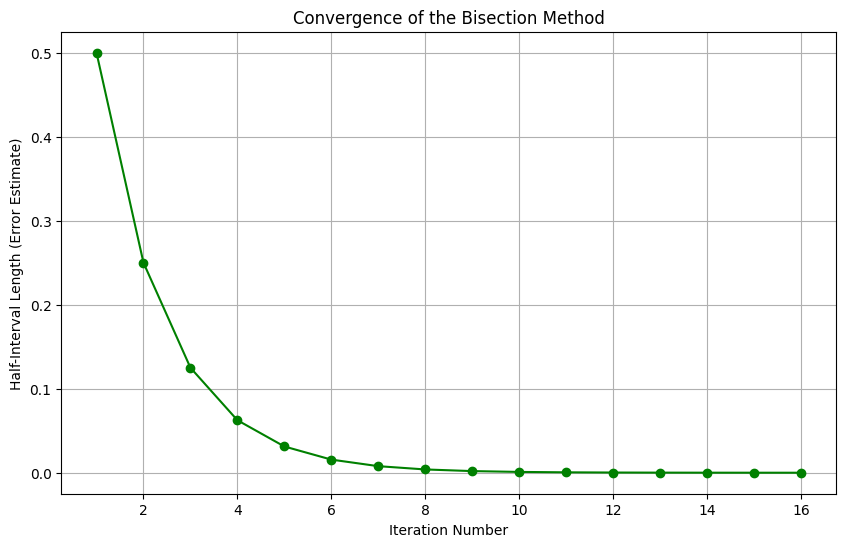

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 2*x - 5

def bisection_method(f, a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have opposite signs at endpoints a and b.")

    midpoints = []
    errors = []
    iteration = 0

    while (b - a) / 2.0 > tol and iteration < max_iter:
        m = (a + b) / 2.0
        midpoints.append(m)
        error = (b - a) / 2.0
        errors.append(error)

        if abs(f(m)) < tol:
            break

        if f(a) * f(m) < 0:
            b = m
        else:
            a = m

        iteration += 1

    return m, midpoints, errors, iteration

a, b = 2, 3

tolerance = 1e-5

root, midpoints, errors, num_iterations = bisection_method(f, a, b, tol=tolerance)
print(f"Estimated Root: {root:.6f}")
print(f"Number of Iterations: {num_iterations}")

x_vals = np.linspace(a - 1, b + 1, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^3 - 2x - 5$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)  # x-axis line.
plt.scatter(root, f(root), color='red', zorder=5, label=f'Root = {root:.6f}')
plt.axvline(root, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method: Root Finding for $f(x) = x^3 - 2x - 5$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', color='green')
plt.xlabel('Iteration Number')
plt.ylabel('Half-Interval Length (Error Estimate)')
plt.title('Convergence of the Bisection Method')
plt.grid(True)
plt.show()




---



# 19.4 Newton-Raphson Method

The **Newton-Raphson Method** is a powerful and fast iterative technique for finding a root of a function \( f(x) = 0 \). Unlike bracketing methods (such as the bisection method), Newton-Raphson uses the derivative of the function to generate successively better approximations of the root.

1. **Initial Guess:**  
   Start with an initial guess \( x_0 \) for the root.
   
2. **Tangent Line Approximation:**  
   At each iteration, compute the tangent line to \( f(x) \) at the current guess \( x_n \). The equation of the tangent line is:
   \[
   L(x) = f(x_n) + f'(x_n)(x - x_n)
   \]
   
3. **Update Step:**  
   Find the x-intercept of the tangent line (i.e., solve \( L(x) = 0 \)). This gives the next approximation:
   \[
   x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
   \]
   
4. **Iteration and Convergence:**  
   Repeat the process until the change between iterations is below a specified tolerance or until the function value is sufficiently close to zero.


- **Fast Convergence:**  
  Under suitable conditions, the method converges quadratically, meaning that the number of correct digits roughly doubles with each iteration.
  
- **Dependence on Derivatives:**  
  The method requires an analytical or numerical derivative \( f'(x) \). Poor initial guesses or points where \( f'(x) \) is near zero can lead to divergence.

Estimated Root: 2.094552
Total Iterations: 5


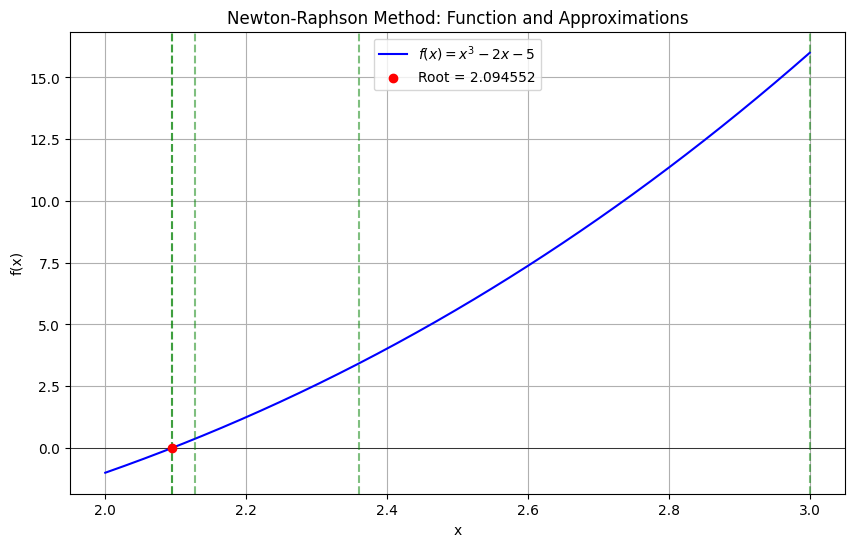

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

def newton_raphson(f, df, x0, tol=1e-5, max_iter=20):

    x = x0
    approximations = [x]
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        if abs(fx) < tol:
            break

        x_new = x - fx/dfx
        approximations.append(x_new)

        if abs(x_new - x) < tol:
            x = x_new
            break

        x = x_new

    return x, approximations, i+1

x0 = 3.0
tolerance = 1e-5

root, approximations, num_iterations = newton_raphson(f, df, x0, tol=tolerance)
print(f"Estimated Root: {root:.6f}")
print(f"Total Iterations: {num_iterations}")

x_vals = np.linspace(2, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals, label=r'$f(x)=x^3-2x-5$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)  # x-axis.
plt.scatter(root, 0, color='red', zorder=5, label=f'Root = {root:.6f}')

for approx in approximations:
    plt.axvline(approx, color='green', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method: Function and Approximations')
plt.legend()
plt.grid(True)
plt.show()




---



# 19.5 Root Finding in Python

Python offers libraries to solve root finding problems efficiently and with minimal code. Instead of writing custom implementations, you can leverage functions from libraries such as **SciPy**. SciPy's optimization module provides several methods—including the bisection, Newton-Raphson, and secant methods—to locate roots of a function.

## Key Functions in SciPy
- **`scipy.optimize.bisect`**: Uses the bisection method on an interval where the function changes sign.
- **`scipy.optimize.newton`**: Uses the Newton-Raphson method (or secant method if the derivative is not provided) to find the root.
- **`scipy.optimize.root_scalar`**: Provides a unified interface to several root-finding methods.